In [24]:
import sys
import torch
import matplotlib.pyplot as plt

sys.path.append("../training/")
from utils.nn import StyleGANGenerator, ProGANGenerator, Discriminator, LATENT_DIM, MIN_WORKING_RESOLUTION

In [ ]:
MODEL_PATH = "/exports/lkeb-hpc/csrao/git-personal/stylegan/training/training_output/checkpoints/iter_365000.pt"

In [26]:
state_dict = torch.load(MODEL_PATH)
model = StyleGANGenerator(128, prog_growth=True).to('cuda').eval()
# for _ in range(4):
#     model.grow_new_block()
#     model.fuse_new_block()
model.load_state_dict(state_dict['net_g_state_dict'])

<All keys matched successfully>

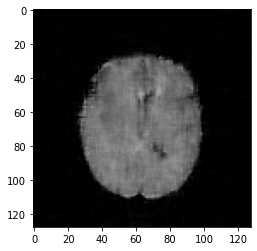

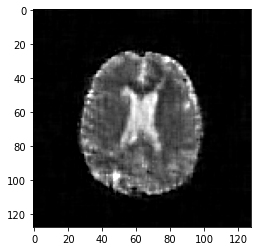

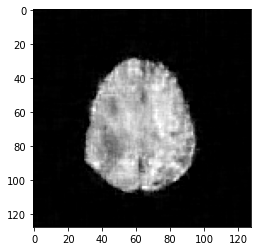

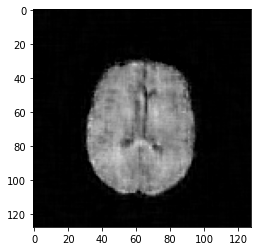

In [34]:
latent = torch.randn((4, 512), device='cuda')
samples = model(latent).cpu().detach().numpy()
for i in range(4):
    plt.imshow(samples[i].squeeze(), cmap='gray', vmin=-1, vmax=1); plt.show()